In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set_theme(style='whitegrid')
try:
    df = pd.read_csv('../Data/birds_db.csv')
except FileNotFoundError:
    exit()

target_species = 'Collared flycatcher'
bird_data = df[df['species'] == target_species].copy()

In [3]:
winter = bird_data[bird_data['phase'].str.contains('Winter', case=False, na=False)]['ndvi']
breeding = bird_data[bird_data['phase'].str.contains('Breeding|Spring', case=False, na=False)]['ndvi']

print(f'Winter samples: {len(winter)}, Breeding samples: {len(breeding)}')

# Perform the test
if len(winter) > 1 and len(breeding) > 1:
    t_stat, p_val = stats.ttest_ind(winter, breeding, nan_policy='omit')
    
    print(f'\nT-Statistic: {t_stat:.4f}')
    print(f'P-Value:     {p_val:.4e}')
    
    if p_val < 0.05:
        print('CONCLUSION: Significant difference found (Hypothesis Confirmed).')
    else:
        print('CONCLUSION: No significant difference.')
else:
    print('Insufficient data for T-test.')

Winter samples: 154, Breeding samples: 2546

T-Statistic: 2.8589
P-Value:     4.2835e-03
CONCLUSION: Significant difference found (Hypothesis Confirmed).


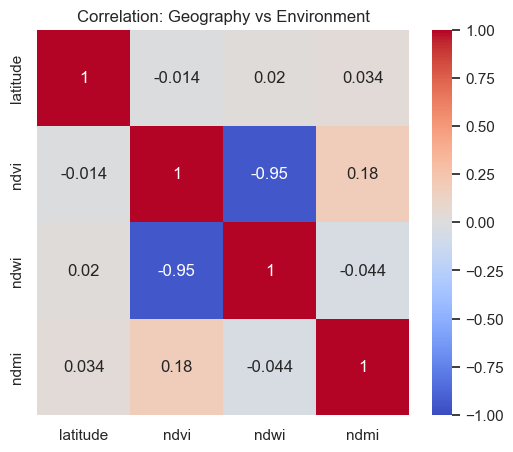

In [4]:
cols = ['latitude', 'ndvi', 'ndwi', 'ndmi']
valid_cols = [c for c in cols if c in bird_data.columns]
corr = bird_data[valid_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Geography vs Environment')
plt.show()